# Pobreza y desigualdad

- [Plataforma de pobreza y desigualdad del Banco Mundial](https://pip.worldbank.org/home)
- [Methodology](https://datanalytics.worldbank.org/PIP-Methodology/)
- [API](https://pip.worldbank.org/poverty-calculator)

La línea de pobreza de este set de datos se calcula tomando la mediana de la parte superior de los países de mediano ingreso

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
import seaborn as sns

In [131]:
pd.options.display.float_format = '{:,.2f}'.format

#### Dejamos por fuera las columnas con metadata

In [132]:
df = pd.read_csv("dataSetsEDA\\pop_in_poverty\\pip2.csv", 
                 usecols= ['region_name', 'country_name','reporting_year', 'poverty_line',
                           'headcount','poverty_gap', 'poverty_severity','watts', 'mld', 'gini','polarization','cpi', 'ppp', 
                            'reporting_pop', 'reporting_gdp'])

## Antes que nada vamos a filtrar los años que nos interesan

In [133]:
df.reporting_year.min()

1967

In [134]:
df.reporting_year.max()

2021

In [135]:
df = df[df.reporting_year >= 1990 ]
df = df[df.reporting_year < 2021 ]

In [136]:
df.head()

,region_name,country_name,reporting_year,poverty_line,headcount,poverty_gap,poverty_severity,watts,mld,gini,polarization,cpi,ppp,reporting_pop,reporting_gdp
0,Sub-Saharan Africa,Angola,2000,6.85,0.67,0.35,0.23,0.64,0.51,0.52,0.46,0.01,107.27,16395477,"2,451.51"
1,Sub-Saharan Africa,Angola,2008,6.85,0.69,0.33,0.19,0.52,0.31,0.43,0.39,0.30,107.27,21695636,"4,077.78"
2,Sub-Saharan Africa,Angola,2018,6.85,0.78,0.45,0.30,0.82,0.48,0.51,0.47,1.23,107.27,30809787,"3,595.11"
3,Europe & Central Asia,Albania,1996,6.85,0.48,0.14,0.06,0.18,0.12,0.27,0.24,0.40,50.36,3168033,"1,633.55"
4,Europe & Central Asia,Albania,2002,6.85,0.52,0.16,0.07,0.22,0.16,0.32,0.27,0.70,50.36,3051010,"2,247.50"


In [137]:
df2005 = df[df['reporting_year'] == 2020]
df2005

,region_name,country_name,reporting_year,poverty_line,headcount,poverty_gap,poverty_severity,watts,mld,gini,polarization,cpi,ppp,reporting_pop,reporting_gdp
50,Latin America & Caribbean,Argentina,2020,6.85,0.14,0.05,0.02,0.06,0.32,0.42,0.41,3.14,10.81,41796990,"11,344.41"
72,Europe & Central Asia,Armenia,2020,6.85,0.53,0.14,0.05,0.18,0.10,0.25,0.20,1.05,167.31,2963234,"4,021.05"
209,Europe & Central Asia,Belarus,2020,6.85,0.01,0.00,0.00,0.00,0.10,0.24,0.20,1.17,"6,165.21",9379952,"6,234.82"
239,Latin America & Caribbean,Bolivia,2020,6.85,0.17,0.07,0.04,0.10,0.35,0.44,0.40,1.05,2.61,11673029,"2,983.03"
275,Latin America & Caribbean,Brazil,2020,6.85,0.19,0.06,0.03,0.09,0.42,0.49,0.41,1.11,2.33,212559409,"8,228.78"
336,Latin America & Caribbean,Chile,2020,6.85,0.08,0.02,0.01,0.03,0.35,0.45,0.38,1.09,479.00,19116209,"12,954.41"
441,Latin America & Caribbean,Colombia,2020,6.85,0.44,0.21,0.13,0.32,0.55,0.54,0.50,1.10,"1,419.37",50882884,"5,892.48"
480,Latin America & Caribbean,Costa Rica,2020,6.85,0.20,0.07,0.04,0.10,0.44,0.49,0.49,1.05,372.67,5094114,"12,105.93"
595,Latin America & Caribbean,Dominican Republic,2020,6.85,0.24,0.07,0.03,0.09,0.27,0.40,0.35,1.09,24.39,10847904,"7,677.71"
622,Latin America & Caribbean,Ecuador,2020,6.85,0.35,0.14,0.08,0.23,0.41,0.47,0.43,0.99,0.57,17643060,"5,317.68"


In [138]:
df2000.shape

(94, 15)

In [139]:
df2010

,region_name,country_name,reporting_year,poverty_line,headcount,poverty_gap,poverty_severity,watts,mld,gini,polarization,cpi,ppp,reporting_pop,reporting_gdp
2,Sub-Saharan Africa,Angola,2018,3.65,0.53,0.25,0.15,0.40,0.48,0.51,0.47,1.23,107.27,30809787,"3,595.11"
14,Europe & Central Asia,Albania,2018,3.65,0.03,0.00,0.00,0.01,0.15,0.30,0.27,1.02,50.36,2866376,"4,431.54"
15,Europe & Central Asia,Albania,2018,3.65,0.11,0.04,0.02,0.05,0.23,0.36,0.32,1.02,50.36,2866376,"4,431.54"
18,Other High Income Countries,United Arab Emirates,2018,3.65,0.00,0.00,0.00,0.00,0.11,0.26,0.24,1.03,2.83,9630966,"39,670.93"
48,Latin America & Caribbean,Argentina,2018,3.65,0.03,0.01,0.00,0.01,0.31,0.41,0.39,1.49,10.81,40877099,"13,105.40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,Sub-Saharan Africa,Tanzania,2018,3.65,0.74,0.34,0.18,0.50,0.27,0.40,0.33,1.03,754.62,56313444,"1,042.99"
2080,Europe & Central Asia,Ukraine,2018,3.65,0.00,0.00,0.00,0.00,0.11,0.26,0.21,1.11,7.01,44622518,"2,336.98"
2108,Latin America & Caribbean,Uruguay,2018,3.65,0.00,0.00,0.00,0.00,0.27,0.40,0.36,1.02,24.85,3449290,"16,037.93"
2141,Other High Income Countries,United States,2018,3.65,0.01,0.01,0.01,0.01,0.33,0.41,0.37,1.02,1.00,326838199,"59,821.59"


In [140]:
df.tail()

,region_name,country_name,reporting_year,poverty_line,headcount,poverty_gap,poverty_severity,watts,mld,gini,polarization,cpi,ppp,reporting_pop,reporting_gdp
2204,Sub-Saharan Africa,Zambia,2010,6.85,0.93,0.70,0.56,1.54,0.54,0.56,0.54,0.55,4.22,13605986,"1,214.69"
2205,Sub-Saharan Africa,Zambia,2015,6.85,0.91,0.66,0.52,1.48,0.60,0.57,0.61,0.80,4.22,15879370,"1,338.29"
2206,Sub-Saharan Africa,Zimbabwe,2011,6.85,0.78,0.40,0.24,0.66,0.31,0.43,0.39,0.98,0.49,12894323,"1,248.73"
2207,Sub-Saharan Africa,Zimbabwe,2017,6.85,0.84,0.49,0.32,0.84,0.32,0.44,0.42,1.00,0.49,14236599,"1,479.38"
2208,Sub-Saharan Africa,Zimbabwe,2019,6.85,0.85,0.52,0.36,0.94,0.43,0.50,0.46,1.00,0.49,14645473,"1,414.83"


In [141]:
df.shape

(2057, 15)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2208
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region_name       2057 non-null   object 
 1   country_name      2057 non-null   object 
 2   reporting_year    2057 non-null   int64  
 3   poverty_line      2057 non-null   float64
 4   headcount         2056 non-null   float64
 5   poverty_gap       2056 non-null   float64
 6   poverty_severity  2056 non-null   float64
 7   watts             2056 non-null   float64
 8   mld               2053 non-null   float64
 9   gini              2053 non-null   float64
 10  polarization      2053 non-null   float64
 11  cpi               2057 non-null   float64
 12  ppp               2005 non-null   float64
 13  reporting_pop     2057 non-null   int64  
 14  reporting_gdp     2057 non-null   float64
dtypes: float64(11), int64(2), object(2)
memory usage: 257.1+ KB


### Chequeo de valores nulos

In [143]:
df.isna().any().any()

True

In [144]:
df.isna().mean() * 100

region_name        0.00
country_name       0.00
reporting_year     0.00
poverty_line       0.00
headcount          0.05
poverty_gap        0.05
poverty_severity   0.05
watts              0.05
mld                0.19
gini               0.19
polarization       0.19
cpi                0.00
ppp                2.53
reporting_pop      0.00
reporting_gdp      0.00
dtype: float64

<AxesSubplot:>

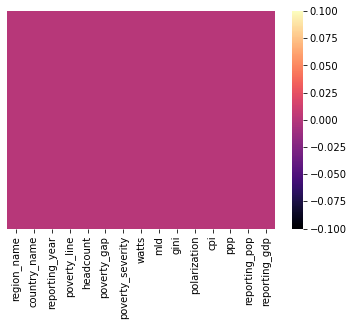

In [148]:
sns.heatmap(df.isna(),yticklabels=False,cmap = "magma")

#### Como tenemos varios índices, algunos para medir la pobreza y otros para medir la desigualdad, queremos asegurarnos de no analizar variables que tengan una gran correlación 

In [146]:
df = df[df.gini.isna() == False]

In [147]:
df = df[df.ppp.isna() == False]

In [149]:
df

,region_name,country_name,reporting_year,poverty_line,headcount,poverty_gap,poverty_severity,watts,mld,gini,polarization,cpi,ppp,reporting_pop,reporting_gdp
0,Sub-Saharan Africa,Angola,2000,6.85,0.67,0.35,0.23,0.64,0.51,0.52,0.46,0.01,107.27,16395477,"2,451.51"
1,Sub-Saharan Africa,Angola,2008,6.85,0.69,0.33,0.19,0.52,0.31,0.43,0.39,0.30,107.27,21695636,"4,077.78"
2,Sub-Saharan Africa,Angola,2018,6.85,0.78,0.45,0.30,0.82,0.48,0.51,0.47,1.23,107.27,30809787,"3,595.11"
3,Europe & Central Asia,Albania,1996,6.85,0.48,0.14,0.06,0.18,0.12,0.27,0.24,0.40,50.36,3168033,"1,633.55"
4,Europe & Central Asia,Albania,2002,6.85,0.52,0.16,0.07,0.22,0.16,0.32,0.27,0.70,50.36,3051010,"2,247.50"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,Sub-Saharan Africa,Zambia,2010,6.85,0.93,0.70,0.56,1.54,0.54,0.56,0.54,0.55,4.22,13605986,"1,214.69"
2205,Sub-Saharan Africa,Zambia,2015,6.85,0.91,0.66,0.52,1.48,0.60,0.57,0.61,0.80,4.22,15879370,"1,338.29"
2206,Sub-Saharan Africa,Zimbabwe,2011,6.85,0.78,0.40,0.24,0.66,0.31,0.43,0.39,0.98,0.49,12894323,"1,248.73"
2207,Sub-Saharan Africa,Zimbabwe,2017,6.85,0.84,0.49,0.32,0.84,0.32,0.44,0.42,1.00,0.49,14236599,"1,479.38"


#### Vamos a filtrar los índices de pobreza y desigualdad para medir su correlatividad

In [150]:
dfc = df[['poverty_line','headcount','poverty_gap','poverty_severity','watts','mld','gini','polarization','cpi','ppp']]

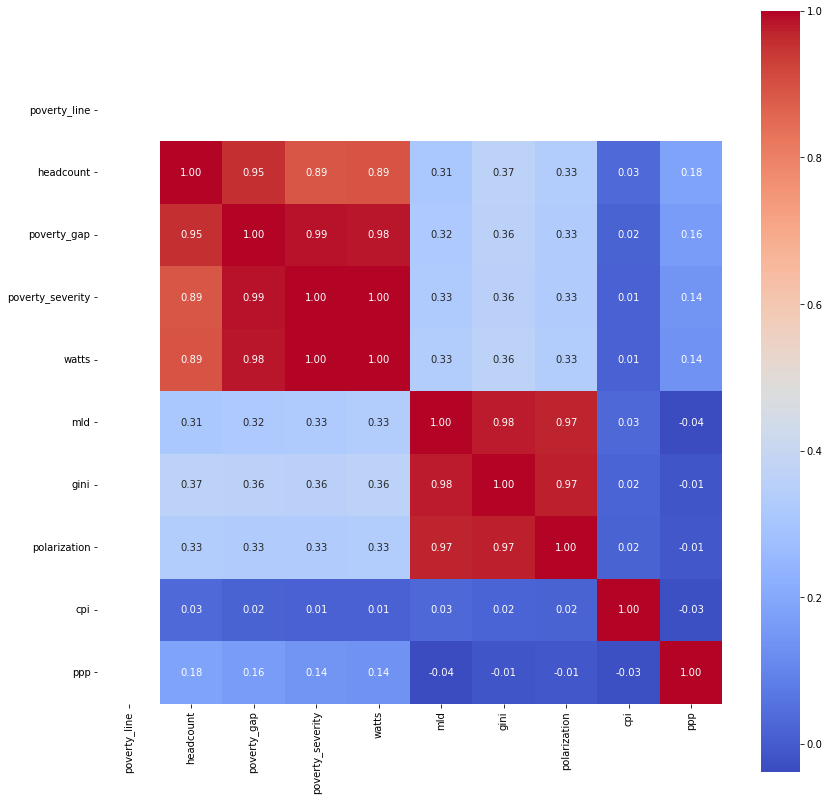

In [156]:
corr = dfc.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= dfc.columns, 
           yticklabels= dfc.columns,
           cmap= 'coolwarm')
plt.show()

#### Vemos que los indicadores de pobreza, en el cuadrante superior izquierdo, tienen alta correlatividad entre sí. Lo mismo ocurre con los indicadores de desigualdad (cuadrado rojo en el medio del gráfico). Vamos a eliminar algunas de estas columnas. 

Los métodos poverty severity y headcount sirven para medir la pobreza, el primero es más elaborado y tiene en cuenta
cuestiones de desigualdad, mientras que el primero es una simple proporción poblacional. Sin embargo en este trabajo 
no vamos a tener en cuenta estas cuestiones técnicas, priorizaremos no incluir campos con alta correlatividad y que 
pertenezcan a una misma categoría.

In [152]:
df.drop(columns = ['poverty_gap', 'poverty_severity', 'watts'], inplace = True ) 

In [153]:
df.drop(columns = ['mld','polarization'], inplace = True)

#### La paridad de poder adquisitivo (columna ppp), tiene un valor único para cada país; solo muestra cual es el poder de compra de los ciudadanos de ese país en base 2017. No es un dato que vayamos a utilizar.

In [154]:
df.drop(columns = 'ppp', inplace= True ) 

In [155]:
df.iloc[0:50]

,region_name,country_name,reporting_year,poverty_line,headcount,gini,cpi,reporting_pop,reporting_gdp
0,Sub-Saharan Africa,Angola,2000,6.85,0.67,0.52,0.01,16395477,"2,451.51"
1,Sub-Saharan Africa,Angola,2008,6.85,0.69,0.43,0.30,21695636,"4,077.78"
2,Sub-Saharan Africa,Angola,2018,6.85,0.78,0.51,1.23,30809787,"3,595.11"
3,Europe & Central Asia,Albania,1996,6.85,0.48,0.27,0.40,3168033,"1,633.55"
4,Europe & Central Asia,Albania,2002,6.85,0.52,0.32,0.70,3051010,"2,247.50"
5,Europe & Central Asia,Albania,2005,6.85,0.40,0.31,0.75,3011487,"2,675.51"
6,Europe & Central Asia,Albania,2008,6.85,0.33,0.30,0.82,2947314,"3,298.48"
7,Europe & Central Asia,Albania,2012,6.85,0.37,0.29,0.92,2900401,"3,736.34"
8,Europe & Central Asia,Albania,2014,6.85,0.39,0.35,0.95,2889104,"3,855.76"
9,Europe & Central Asia,Albania,2015,6.85,0.26,0.33,0.98,2880703,"3,952.80"


#### Estableceremos una línea divisoria del headcount en 0,2. Es decir que consideraremos país pobre a aquel que tiene al menos a 20 % de su población debajo de la línea de pobreza establecida por la mediana de la mitad superior de los países de medianos ingresos.

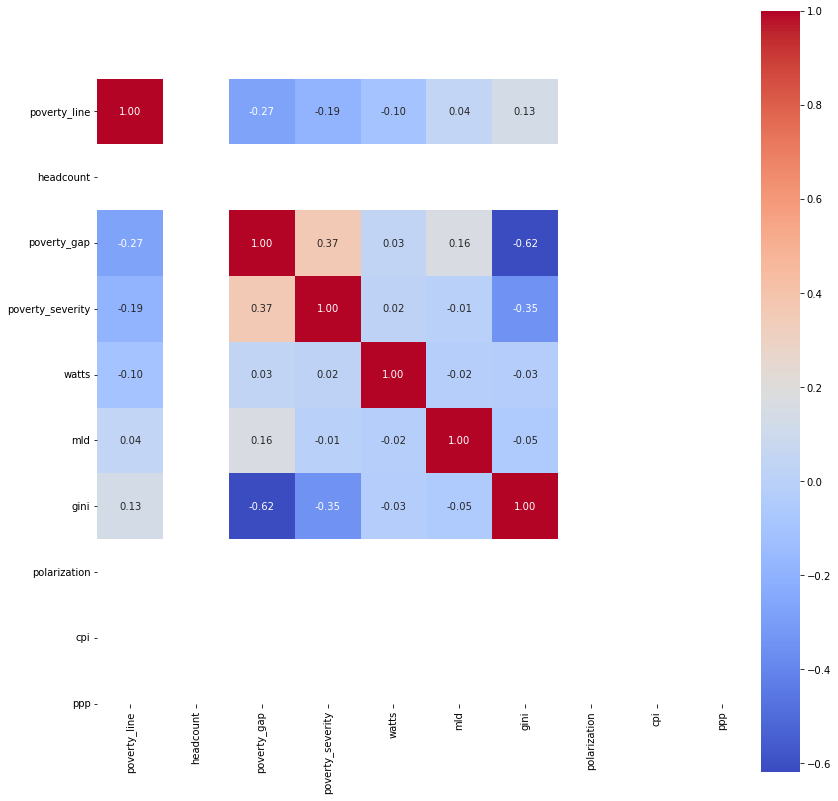

In [158]:
corr = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= dfc.columns, 
           yticklabels= dfc.columns,
           cmap= 'coolwarm')
plt.show()